<a href="https://colab.research.google.com/github/pacnpacn/BUGAN/blob/master/script_load3Dobj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#right click shared folder IRCMS_GAN_collaborative_database and "Add shortcut to Drive" to My drive
%cd drive/My Drive/IRCMS_GAN_collaborative_database/Research/Peter/Tree_3D_models_obj/
!ls

/content/drive/.shortcut-targets-by-id/1ylB2p6N0qQ-G4OsBuwcZ9C0tsqVu9ww4/IRCMS_GAN_collaborative_database/Research/Peter/Tree_3D_models_obj
maple_1.obj	   maple_3.obj	       old_2.obj
maple_1_voxel.ply  maple_example2.mtl  old_3.obj
maple_2.obj	   maple_example2.obj  PyMesh
maple_2_voxel.ply  old_1.obj	       script_load3Dobj.ipynb


In [3]:
!pip install open3d

#add open3d to process mesh and point cloud

In [4]:
import open3d as o3d
import numpy as np

In [5]:
mesh = o3d.io.read_triangle_mesh('maple_1.obj')

[Open3D WARNING] Read OBJ failed: Material file [ maple_1.mtl ] not found.
Failed to load material file(s). Use default material.



In [6]:
vox = o3d.geometry.VoxelGrid.create_from_triangle_mesh(mesh, 1)  # voxel_size=1. initial:10 mins, after:2 mins per mesh

In [7]:
print(vox.dimension())
print(vox.origin)
print(vox.voxel_size)

3
[-27.48892593  -8.24259281 -42.37924957]
1.0


In [8]:
voxels = vox.get_voxels()
len(voxels)
voxels[0].grid_index

array([61,  4, 39], dtype=int32)

In [9]:
box = vox.get_oriented_bounding_box()
print(box.center)
print(box.extent)
print(np.array(box.get_box_points()))

[  3.51107407  20.25740719 -10.37924957]
[62. 57. 64.]
[[-27.48892593  -8.24259281 -42.37924957]
 [ 34.51107407  -8.24259281 -42.37924957]
 [-27.48892593  48.75740719 -42.37924957]
 [-27.48892593  -8.24259281  21.62075043]
 [ 34.51107407  48.75740719  21.62075043]
 [-27.48892593  48.75740719  21.62075043]
 [ 34.51107407  -8.24259281  21.62075043]
 [ 34.51107407  48.75740719 -42.37924957]]


In [10]:
boxa = vox.get_axis_aligned_bounding_box()
print(boxa.get_center())
print(boxa.get_extent())
print(np.array(boxa.get_box_points()))

[  3.51107407  20.25740719 -10.37924957]
[62. 57. 64.]
[[-27.48892593  -8.24259281 -42.37924957]
 [ 34.51107407  -8.24259281 -42.37924957]
 [-27.48892593  48.75740719 -42.37924957]
 [-27.48892593  -8.24259281  21.62075043]
 [ 34.51107407  48.75740719  21.62075043]
 [-27.48892593  48.75740719  21.62075043]
 [ 34.51107407  -8.24259281  21.62075043]
 [ 34.51107407  48.75740719 -42.37924957]]


In [11]:
o3d.io.write_voxel_grid('maple_1_voxel.ply', vox)

True

#test other files

In [12]:
mesh2 = o3d.io.read_triangle_mesh('maple_2.obj')

[Open3D WARNING] Read OBJ failed: Material file [ maple_2.mtl ] not found.
Failed to load material file(s). Use default material.



In [13]:
vox2 = o3d.geometry.VoxelGrid.create_from_triangle_mesh(mesh2, 1)  # voxel_size=1 for 10 mins

In [14]:
print(vox2.dimension())
print(vox2.origin)
print(vox2.voxel_size)

3
[-37.31856537  -7.92582178 -50.0648613 ]
1.0


In [15]:
voxels2 = vox2.get_voxels()
len(voxels2)
voxels2[0].grid_index

array([64, 10, 58], dtype=int32)

In [16]:
box2 = vox2.get_oriented_bounding_box()
print(box2.center)
print(box2.extent)
print(np.array(box2.get_box_points()))

[ -4.81856537  22.57417822 -15.0648613 ]
[65. 61. 70.]
[[-37.31856537  -7.92582178 -50.0648613 ]
 [ 27.68143463  -7.92582178 -50.0648613 ]
 [-37.31856537  53.07417822 -50.0648613 ]
 [-37.31856537  -7.92582178  19.9351387 ]
 [ 27.68143463  53.07417822  19.9351387 ]
 [-37.31856537  53.07417822  19.9351387 ]
 [ 27.68143463  -7.92582178  19.9351387 ]
 [ 27.68143463  53.07417822 -50.0648613 ]]


In [17]:
boxa2 = vox2.get_axis_aligned_bounding_box()
print(boxa2.get_center())
print(boxa2.get_extent())
print(np.array(boxa2.get_box_points()))

[ -4.81856537  22.57417822 -15.0648613 ]
[65. 61. 70.]
[[-37.31856537  -7.92582178 -50.0648613 ]
 [ 27.68143463  -7.92582178 -50.0648613 ]
 [-37.31856537  53.07417822 -50.0648613 ]
 [-37.31856537  -7.92582178  19.9351387 ]
 [ 27.68143463  53.07417822  19.9351387 ]
 [-37.31856537  53.07417822  19.9351387 ]
 [ 27.68143463  -7.92582178  19.9351387 ]
 [ 27.68143463  53.07417822 -50.0648613 ]]


In [18]:
o3d.io.write_voxel_grid('maple_2_voxel.ply', vox2)

True

#visualization

In [55]:
def voxel2array(voxel):
    vox_array = np.zeros((100,100,100))
    vox_list = voxel.get_voxels()
    for vox in vox_list:
        coord = tuple(vox.grid_index)
        vox_array[coord] = 1
    return vox_array

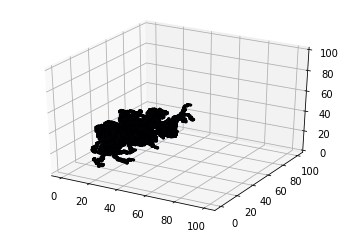

In [45]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.gca(projection='3d')

ax.voxels(voxel2array(vox), edgecolor="k")

plt.show()

In [56]:
vox_array2 = voxel2array(vox2)

print(np.sum(vox_array2))

7208.0


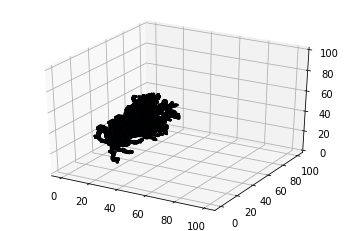

In [44]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.gca(projection='3d')

ax.voxels(vox_array2, edgecolor="k")

plt.show()